In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib.colors import ListedColormap

import torch


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import umap

path = "/media/DOCUMENTOS/Backups/Data"
    
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 25
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20


def scale_array(dat, out_range=(-1, 1)):
    domain = [np.min(dat, axis=0), np.max(dat, axis=0)]

    def interp(x):
        return out_range[0] * (1.0 - x) + out_range[1] * x

    def uninterp(x):
        b = 0
        if (domain[1] - domain[0]) != 0:
            b = domain[1] - domain[0]
        else:
            b =  1.0 / domain[1]
        return (x - domain[0]) / b

    return interp(uninterp(dat))

In [2]:
date="expo_SV0_march_14_2/"
path_coadds= path+ "/desi_data/"+date

In [56]:
df = pd.read_pickle(path_coadds+str(path_coadds.split("/")[-2])+".csv")
df

TARGETID                                         WAVELENGTH  \
0       35186148770843363  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
1       35186148770843761  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
2       35186148770844616  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
3       35186148775036873  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
4       35186148775037106  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
...                   ...                                                ...   
22100  611652019035308252  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
22101  611652019035308990  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
22102  611652022675964123  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
22103  611652022675964343  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   
22104  611652022675964670  [3600.0, 3600.8, 3601.6000000000004, 3602.4000...   

                                                    FLUX  \
0      [16.629738, -7.133062, 4.2576985, 25.119408, 9...   
1      [0.032739643, 10.340323, 0.28587627, 16.81467,...   
2      [9.3599, -0.30654413, 20.865473, 3.4739144, 21...   
3      [0.5740119, 2.6363888, -8.660715, -6.4718666, ...   
4      [-0.729177, 6.761434, 12.152129, 18.775274, 31...   
...                                                  ...   
22100  [0.5972299, 17.676579, 10.872576, 0.93220675, ...   
22101  [4.4486704, -6.756239, -6.7208223, -7.9544024,...   
22102  [9.209778, 3.8351939, -3.8647337, 3.0884986, -...   
22103  [2.428212, -0.7727672, -0.617631, 2.0263023, -...   
22104  [8.260263, -6.7957487, 3.433288, -4.431857, -2...   

                                                 ERRFLUX          CHI2  \
0      [0.017274935, 0.010060674, 0.010030603, 0.0073...  12707.085760   
1      [0.02114713, 0.010559111, 0.010497417, 0.00900...  10390.526888   
2      [0.018445576, 0.009608054, 0.009228553, 0.0082...   9012.405702   
3      [0.019074239, 0.008593588, 0.011730482, 0.0095...   9322.706255   
4      [0.01886503, 0.0092472015, 0.010697438, 0.0077...  10271.535701   
...                                                  ...           ...   
22100  [0.00909646, 0.009056626, 0.012580914, 0.01638...   9479.129530   
22101  [0.012542188, 0.012960598, 0.016695278, 0.0209...   9059.794404   
22102  [0.012941558, 0.014030245, 0.017447231, 0.0226...   9233.822045   
22103  [0.009500552, 0.0090708155, 0.011421528, 0.015...   9129.063329   
22104  [0.013174635, 0.013536587, 0.017266715, 0.0237...   9092.427711   

              Z      ZERR  ZWARN  NPIXELS SPECTYPE SUBTYPE  NCOEFF  \
0     -0.000116  0.000004      0     7928     STAR       M       5   
1      0.000073  0.000007      0     7929     STAR       M       5   
2      0.000272  0.000026      0     7930     STAR       K       5   
3     -0.000187  0.000017      0     7924     STAR       K       5   
4     -0.000076  0.000008      0     7926     STAR       K       5   
...         ...       ...    ...      ...      ...     ...     ...   
22100  0.689862  0.000087      4     7926   GALAXY              10   
22101  0.289601  0.000105      4     7904   GALAXY              10   
22102  0.802210  0.000133      4     7902   GALAXY              10   
22103  0.802328  0.000058      4     7925   GALAXY              10   
22104  0.276225  0.000059      4     7883   GALAXY              10   

          DELTACHI2  NUMEXP  NUMTILE   TILE      NIGHT PETAL  
0      10090.780903       0        1  65008  20200314.     0  
1       5975.451571       0        1  65008  20200314.     0  
2        167.001616       0        1  65008  20200314.     0  
3         42.947868       0        1  65008  20200314.     0  
4       1487.379914       0        1  65008  20200314.     0  
...             ...     ...      ...    ...        ...   ...  
22100      2.981981       0        1  68000  20200314.     9  
22101      0.768590       0        1  68000  20200314.     9  
22102      4.439055       0        1  

In [4]:
columns_D = ['FLUX','TARGETID','TILE']
X = df[columns_D]
Y = np.array(df['SPECTYPE'])
wl = df['WAVELENGTH'][0]

In [5]:
classes = np.unique(Y)
print(classes)
for i, c in enumerate(classes):
    Y[Y == c] = i  # GALAXY=0  -   QSO=1    -  STAR=2
print(Y)

['GALAXY' 'QSO' 'STAR']
[2 2 2 ... 0 0 0]


In [6]:
TID1 = np.array(X['TARGETID']).tolist()
TILE1 = np.array(X['TILE']).tolist()
X1 = np.array(X['FLUX']).tolist()
Y1 = np.array(Y.tolist())


colors = np.zeros((len(Y1),4))
colors[:,0][Y1==0] = 0.45
colors[:,1][Y1==0] = 0.73
colors[:,2][Y1==0] = 1.0

colors[:,0][Y1==1] = 0.76
colors[:,1][Y1==1] = 0
colors[:,2][Y1==1] = 0.47

colors[:,0][Y1==2] = 0.58
colors[:,1][Y1==2] = 0.97
colors[:,2][Y1==2] = 0.48

Z = df['Z']
colors[:,3] = round(scale_array(Z,(0.4,1)),1)
colors

array([[0.58, 0.97, 0.48, 0.4 ],
       [0.58, 0.97, 0.48, 0.4 ],
       [0.58, 0.97, 0.48, 0.4 ],
       ...,
       [0.45, 0.73, 1.  , 0.5 ],
       [0.45, 0.73, 1.  , 0.5 ],
       [0.45, 0.73, 1.  , 0.4 ]])

In [7]:
train = torch.autograd.Variable(torch.Tensor(X1).float())
target = torch.autograd.Variable(torch.Tensor(Y1).long())

mean = train.mean(dim=0)
std = train.std(dim=0)
std[std==0]=1.0

for i in range(len(train)):
    train[i] = (train[i]-mean)/std
print(np.shape(train))
X = train.unsqueeze(1)

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.99, random_state=42)
print(X_train[0].shape)


print(X_train.shape)

try:
    del df
except:
    print("Already delete")

torch.Size([22105, 2751])
torch.Size([1, 2751])
torch.Size([221, 1, 2751])


### Fisrt Configuration  273

In [45]:

# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv1d(1, 50, kernel_size=6, stride=5),
            torch.nn.ReLU(True),
            torch.nn.Conv1d(50,10, kernel_size=4, stride=2),
            torch.nn.ReLU(True),
            torch.nn.Conv1d(10,4, kernel_size=2),
            torch.nn.ReLU(True))        
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose1d(4,10,kernel_size=2),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose1d(10,50,kernel_size=4, stride=2),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose1d(50,1,kernel_size=6, stride=5),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# inicializa modelo, loss y optimizador
num_epochs = 100
model = Autoencoder()

distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

In [46]:
print(model.encoder(X_train)[0][2].detach().numpy().shape)

(273,)


In [48]:
# entrenamiento
L = []
E = []
for epoch in range(num_epochs):
    output = model(X_train)
    loss = distance(output, X_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))
    E.append(epoch+1)
    L.append(loss.item())

epoch [1/100], loss:0.8833
epoch [2/100], loss:0.8833
epoch [3/100], loss:0.8833
epoch [4/100], loss:0.8833
epoch [5/100], loss:0.8833
epoch [6/100], loss:0.8833
epoch [7/100], loss:0.8833
epoch [8/100], loss:0.8833
epoch [9/100], loss:0.8833
epoch [10/100], loss:0.8833
epoch [11/100], loss:0.8833
epoch [12/100], loss:0.8833
epoch [13/100], loss:0.8833
epoch [14/100], loss:0.8833
epoch [15/100], loss:0.8833
epoch [16/100], loss:0.8833
epoch [17/100], loss:0.8833
epoch [18/100], loss:0.8833
epoch [19/100], loss:0.8833
epoch [20/100], loss:0.8833
epoch [21/100], loss:0.8833
epoch [22/100], loss:0.8833
epoch [23/100], loss:0.8833
epoch [24/100], loss:0.8833
epoch [25/100], loss:0.8833
epoch [26/100], loss:0.8833
epoch [27/100], loss:0.8833
epoch [28/100], loss:0.8833
epoch [29/100], loss:0.8833
epoch [30/100], loss:0.8833
epoch [31/100], loss:0.8833
epoch [32/100], loss:0.8833
epoch [33/100], loss:0.8833
epoch [34/100], loss:0.8833
epoch [35/100], loss:0.8833
epoch [36/100], loss:0.8833
e

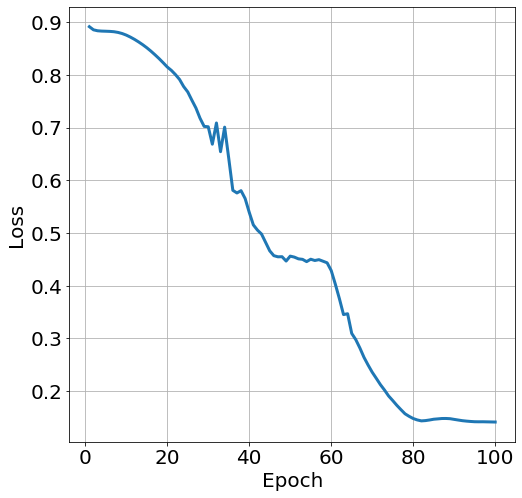

In [33]:
fig = plt.figure(figsize=(8,8))
plt.plot(E,L)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

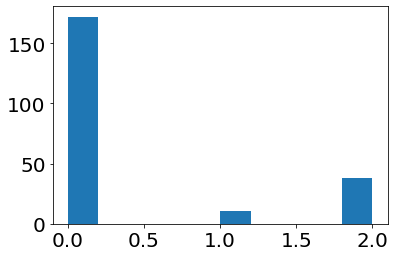

In [34]:
_ = plt.hist(y_train)

In [35]:
x_transform = model(X_train)
latent_space = model.encoder(X_train)

print(X_train.shape)
print(x_transform.shape)
print(latent_space.shape)

torch.Size([221, 1, 2751])
torch.Size([221, 1, 2751])
torch.Size([221, 4, 273])


In [38]:
xt= x_transform.squeeze(1)
print(xt.shape)

torch.Size([221, 2751])


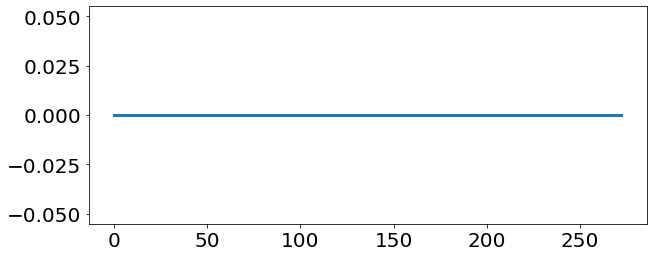

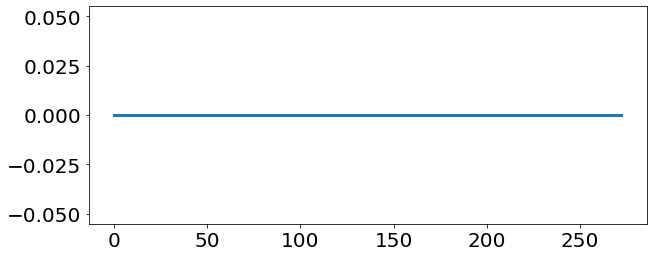

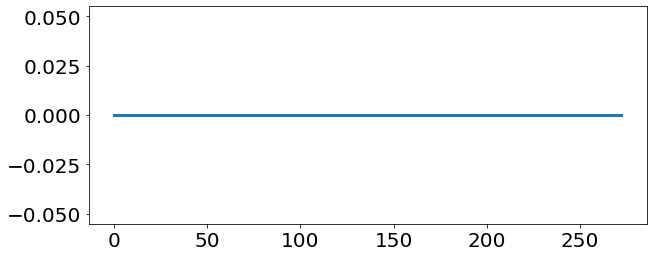

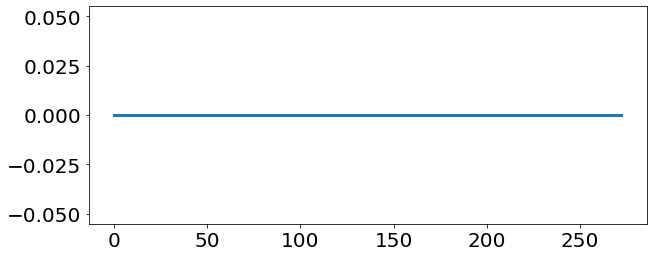

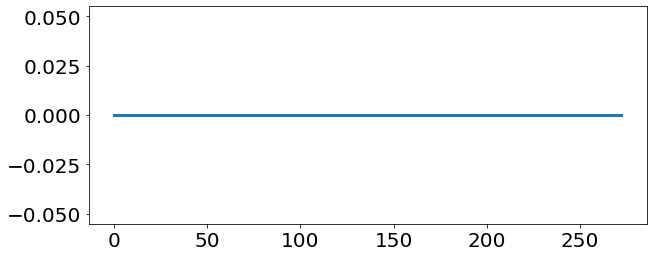

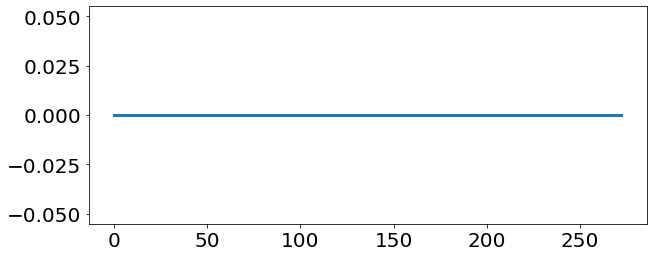

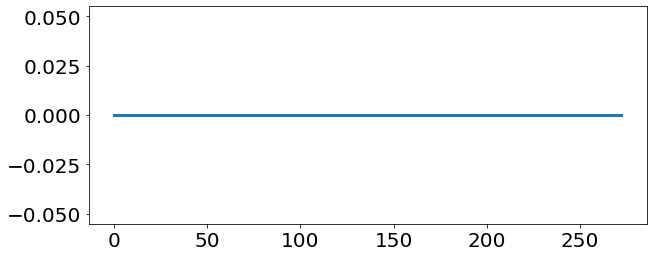

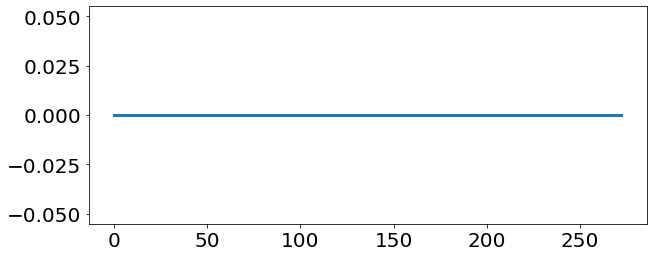

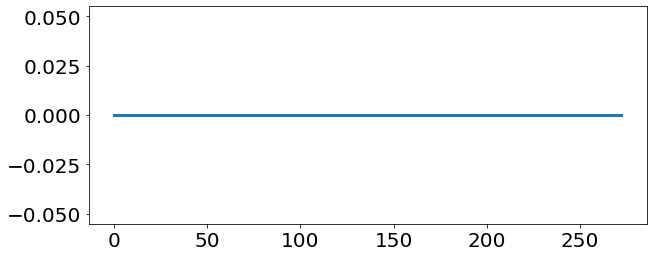

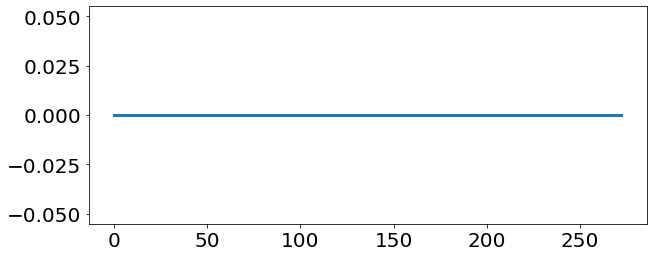

In [41]:
for i in range(10):
    fig = plt.figure(figsize=(10,4))
    plt.plot(latent_space[i][0].detach().numpy())
    plt.show()

###  Exploration

kk = np.arange(1,15,1)

for k in kk:
    ss = np.arange(1,k-1,1)
    for s in ss:
        # define el autoencoder
        class Autoencoder(torch.nn.Module):
            def __init__(self):
                super(Autoencoder,self).__init__()
                self.encoder = torch.nn.Sequential(
                    torch.nn.Conv1d(1, 50, kernel_size=k+2, stride=s),
                    torch.nn.ReLU(True),
                    torch.nn.Conv1d(50,15, kernel_size=k, stride=s),
                    torch.nn.ReLU(True),
                    torch.nn.Conv1d(15,4, kernel_size=k, stride=s),
                    torch.nn.ReLU(True))        
                self.decoder = torch.nn.Sequential(             
                    torch.nn.ConvTranspose1d(4,15,kernel_size=k, stride=s),
                    torch.nn.ReLU(True),
                    torch.nn.ConvTranspose1d(15,50,kernel_size=k, stride=s),
                    torch.nn.ReLU(True),
                    torch.nn.ConvTranspose1d(50,1,kernel_size=k+2, stride=s),
                    torch.nn.ReLU(True))
            def forward(self,x):
                x = self.encoder(x)
                x = self.decoder(x)
                return x

        # inicializa modelo, loss y optimizador
        num_epochs = 100
        model = Autoencoder()
        if(model.encoder(X_train)[0][2].detach().numpy().shape[0]<200):
            print(model.encoder(X_train)[0][2].detach().numpy().shape)
            distance = torch.nn.MSELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

            # entrenamiento
            L = []
            E = []

            try:
                for epoch in range(num_epochs):
                    output = model(X_train)
                    loss = distance(output, X_train)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))
                    E.append(epoch+1)
                    L.append(loss.item())
                print(k,s,end="\n\n\n")
            except:
                print("{} {} Do not work".format(k,s),end="\n\n\n")


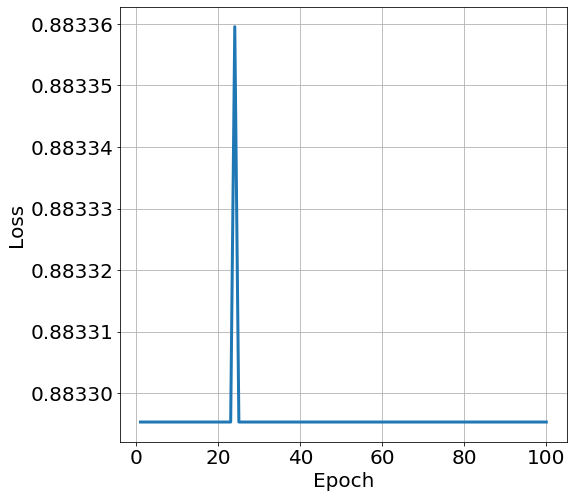

In [16]:
fig = plt.figure(figsize=(8,8))
plt.plot(E,L)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [17]:
x_transform = model(X_train)
latent_space = model.encoder(X_train)

print(X_train.shape)
print(x_transform.shape)
print(latent_space.shape)

torch.Size([221, 1, 2751])
torch.Size([221, 1, 2751])
torch.Size([221, 4, 273])


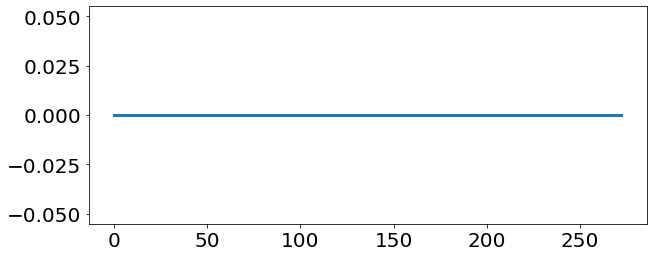

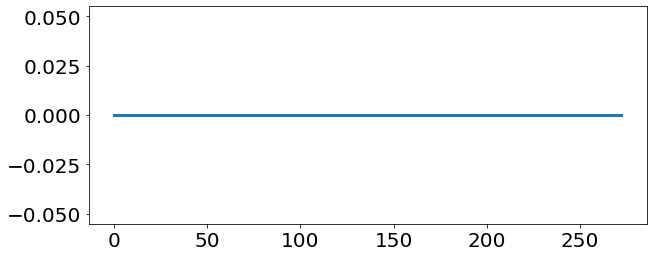

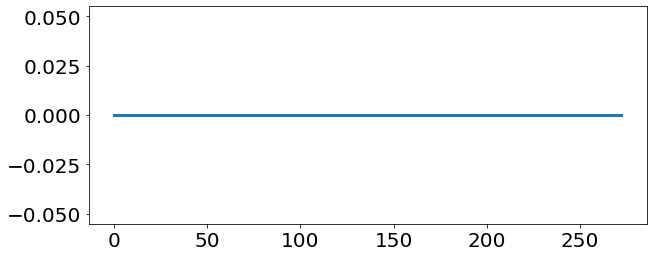

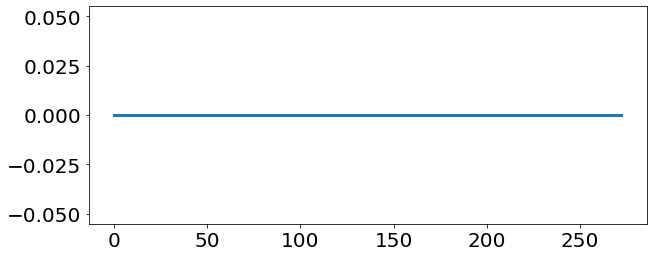

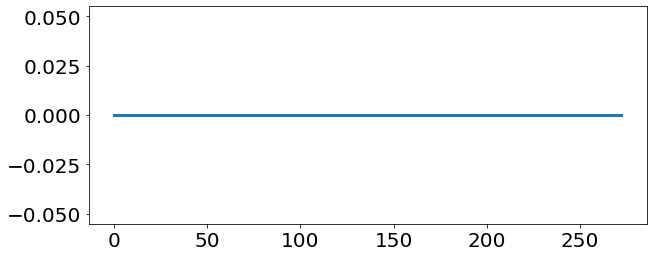

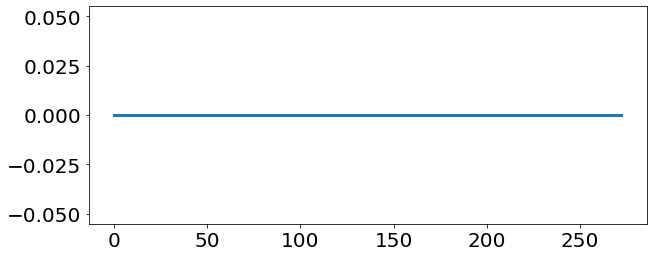

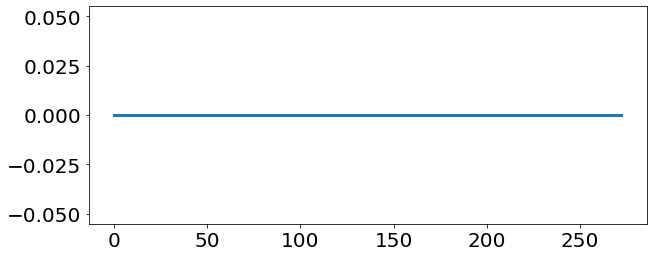

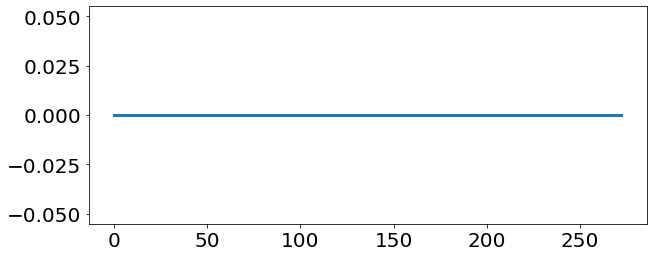

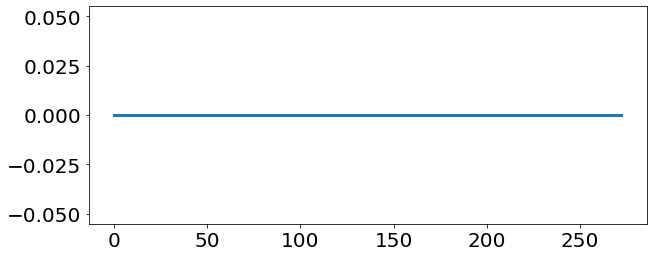

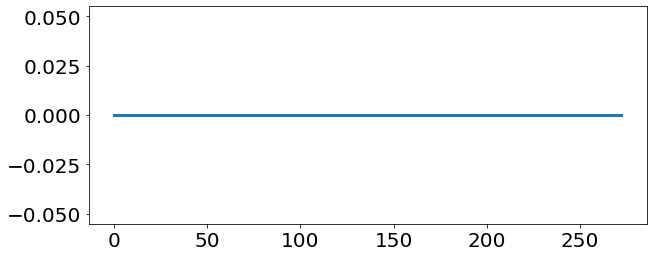

In [18]:
for i in range(10):
    fig = plt.figure(figsize=(10,4))
    plt.plot(latent_space[-i][0].detach().numpy())
    plt.show()

### Second Configuration  42

In [19]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv1d(1, 50, kernel_size=7, stride=4),
            torch.nn.ReLU(True),
            torch.nn.Conv1d(50,15, kernel_size=7, stride=4),
            torch.nn.ReLU(True),
            torch.nn.Conv1d(15,4, kernel_size=7, stride=4),
            torch.nn.ReLU(True))        
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose1d(4,15,kernel_size=7, stride=4),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose1d(15,50,kernel_size=7, stride=4),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose1d(50,1,kernel_size=7, stride=4),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# inicializa modelo, loss y optimizador
num_epochs = 100
model = Autoencoder()

distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

In [20]:
print(model.encoder(X_train)[0][2].detach().numpy().shape)

(42,)


In [21]:
# entrenamiento
L = []
E = []
for epoch in range(num_epochs):
    output = model(X_train)
    loss = distance(output, X_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))
    E.append(epoch+1)
    L.append(loss.item())

epoch [1/100], loss:0.8949
epoch [2/100], loss:0.8813
epoch [3/100], loss:0.8082
epoch [4/100], loss:0.6244
epoch [5/100], loss:0.4330
epoch [6/100], loss:0.5209
epoch [7/100], loss:0.3498
epoch [8/100], loss:0.4220
epoch [9/100], loss:0.4141
epoch [10/100], loss:0.3546
epoch [11/100], loss:0.3523
epoch [12/100], loss:0.3615
epoch [13/100], loss:0.3166
epoch [14/100], loss:0.3090
epoch [15/100], loss:0.3070
epoch [16/100], loss:0.2856
epoch [17/100], loss:0.2582
epoch [18/100], loss:0.2504
epoch [19/100], loss:0.2329
epoch [20/100], loss:0.2051
epoch [21/100], loss:0.1932
epoch [22/100], loss:0.1827
epoch [23/100], loss:0.1680
epoch [24/100], loss:0.1638
epoch [25/100], loss:0.1656
epoch [26/100], loss:0.1588
epoch [27/100], loss:0.1589
epoch [28/100], loss:0.1605
epoch [29/100], loss:0.1560
epoch [30/100], loss:0.1564
epoch [31/100], loss:0.1515
epoch [32/100], loss:0.1503
epoch [33/100], loss:0.1480
epoch [34/100], loss:0.1465
epoch [35/100], loss:0.1468
epoch [36/100], loss:0.1465
e

In [22]:
x_transform = model(X_train)
latent_space = model.encoder(X_train)

print(X_train.shape)
print(x_transform.shape)
print(latent_space.shape)

torch.Size([221, 1, 2751])
torch.Size([221, 1, 2751])
torch.Size([221, 4, 42])


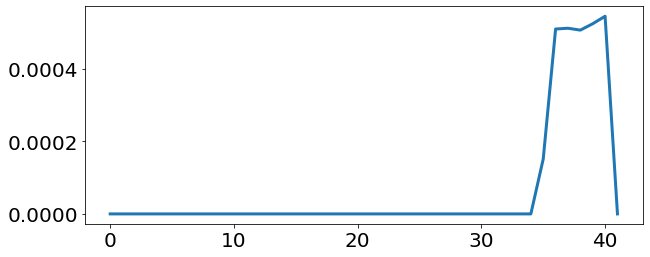

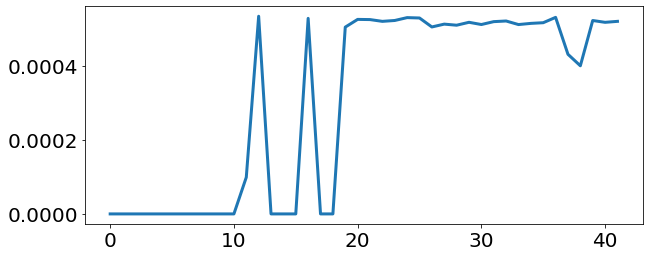

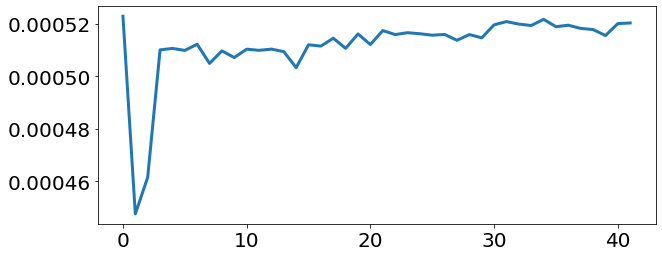

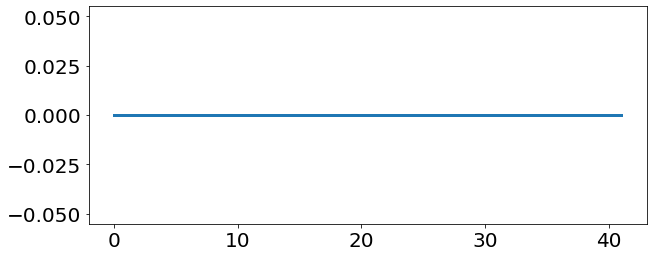

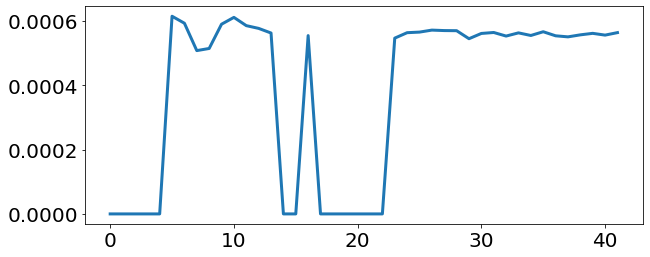

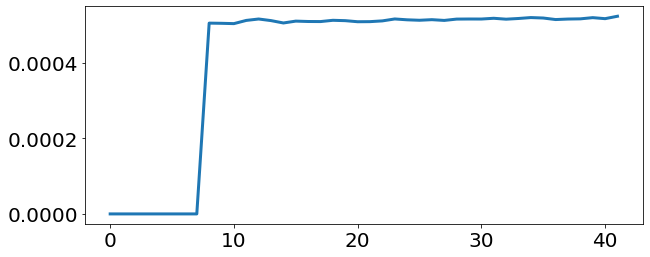

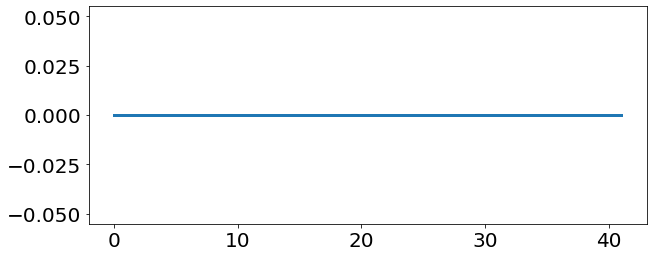

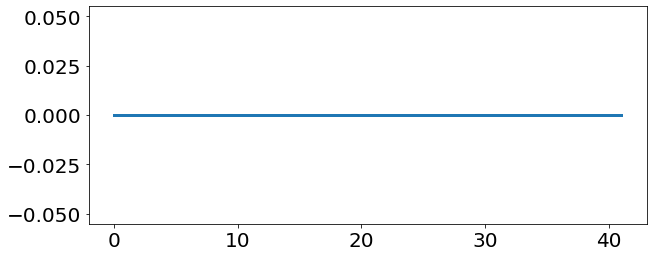

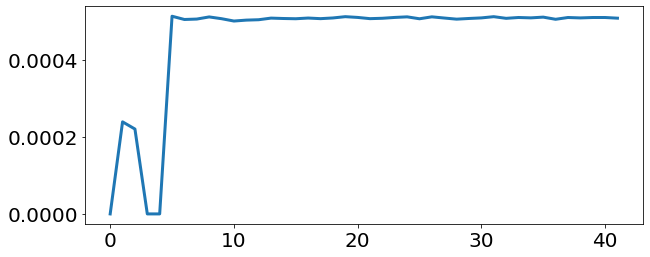

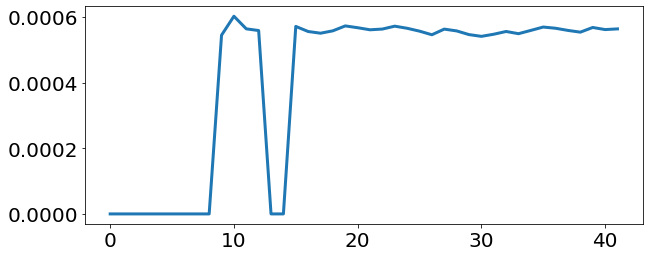

In [23]:
for i in range(10):
    fig = plt.figure(figsize=(10,4))
    plt.plot(latent_space[-i][0].detach().numpy())
    plt.show()

### Third Configuration  21

In [55]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv1d(1, 50, kernel_size=11, stride=5),
            torch.nn.ReLU(True),
            torch.nn.Conv1d(50,15, kernel_size=9, stride=5),
            torch.nn.ReLU(True),
            torch.nn.Conv1d(15,4, kernel_size=9, stride=5),
            torch.nn.ReLU(True))        
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose1d(4,15,kernel_size=9, stride=5),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose1d(15,50,kernel_size=5, stride=5),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose1d(50,1,kernel_size=11, stride=5),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# inicializa modelo, loss y optimizador
num_epochs = 100
model = Autoencoder()

print(model.encoder(X_train)[0][2].detach().numpy().shape)
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

# entrenamiento
L = []
E = []


for epoch in range(num_epochs):
    output = model(X_train)
    loss = distance(output, X_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))
    E.append(epoch+1)
    L.append(loss.item())

(21,)


RuntimeError: The size of tensor a (2731) must match the size of tensor b (2751) at non-singleton dimension 2

In [54]:
x_transform = model(X_train)
latent_space = model.encoder(X_train)

print(X_train.shape)
print(x_transform.shape)
print(latent_space.shape)

torch.Size([221, 1, 2751])
torch.Size([221, 1, 2731])
torch.Size([221, 4, 21])


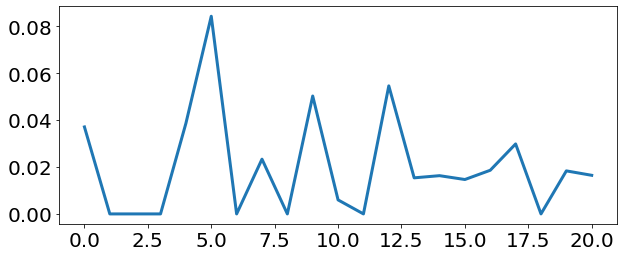

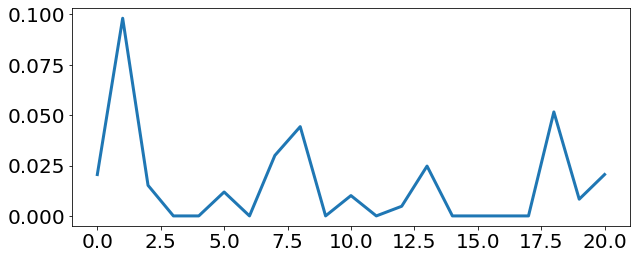

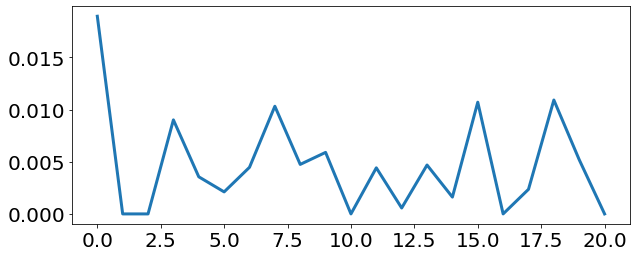

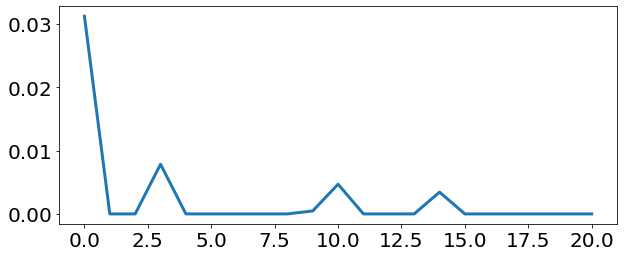

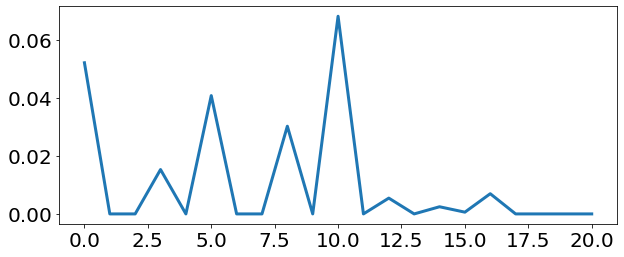

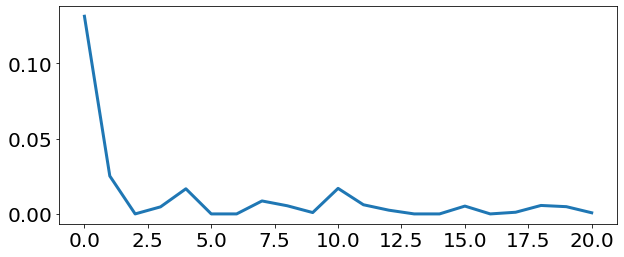

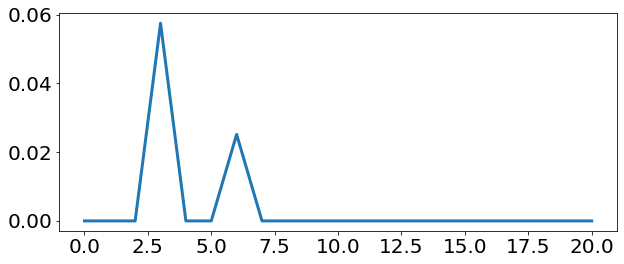

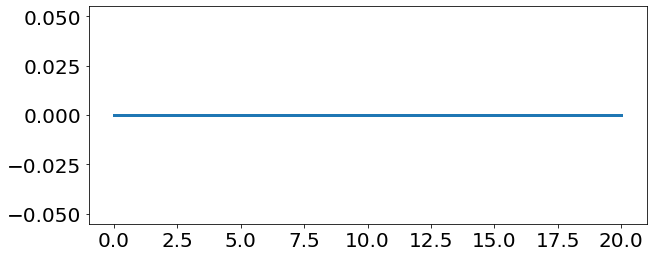

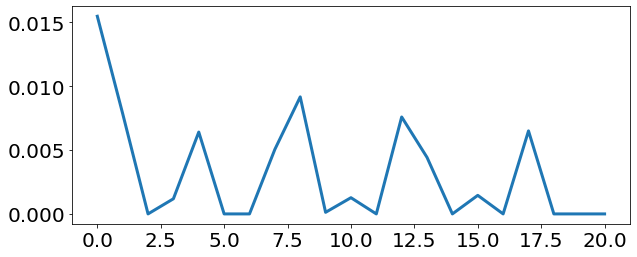

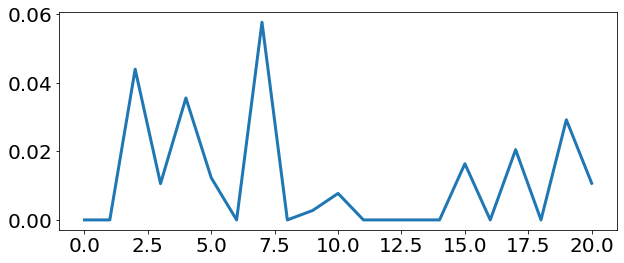

In [51]:
for i in range(10):
    fig = plt.figure(figsize=(10,4))
    plt.plot(latent_space[-i][0].detach().numpy())
    plt.show()